In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf

In [2]:
df_segmentation = pd.read_csv('C:\\Users\\Syed Abdul Ahad\\Desktop\\Customer Analytics Project\\segmentation data.csv', index_col=0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

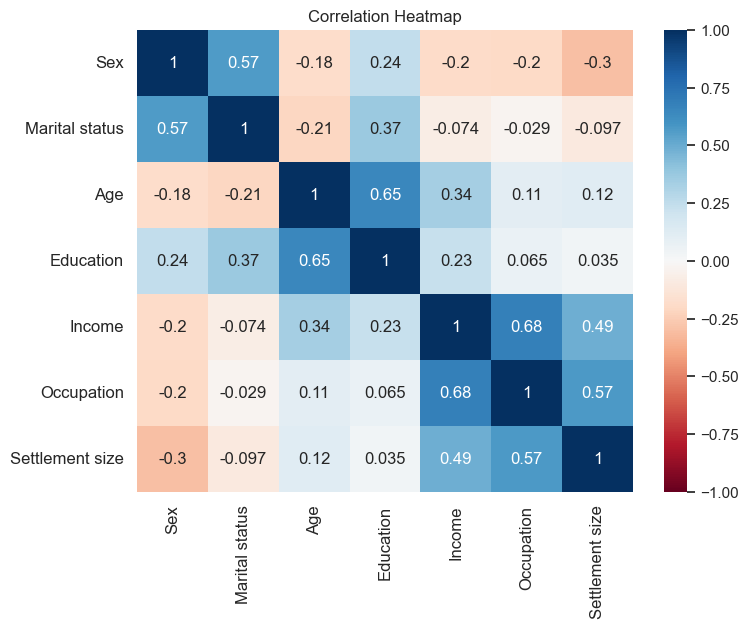

In [6]:
plt.figure(figsize=(8, 6))
s = sns.heatmap(df_segmentation.corr(), 
                annot=True,
                cmap='RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Visualization of Raw Data')

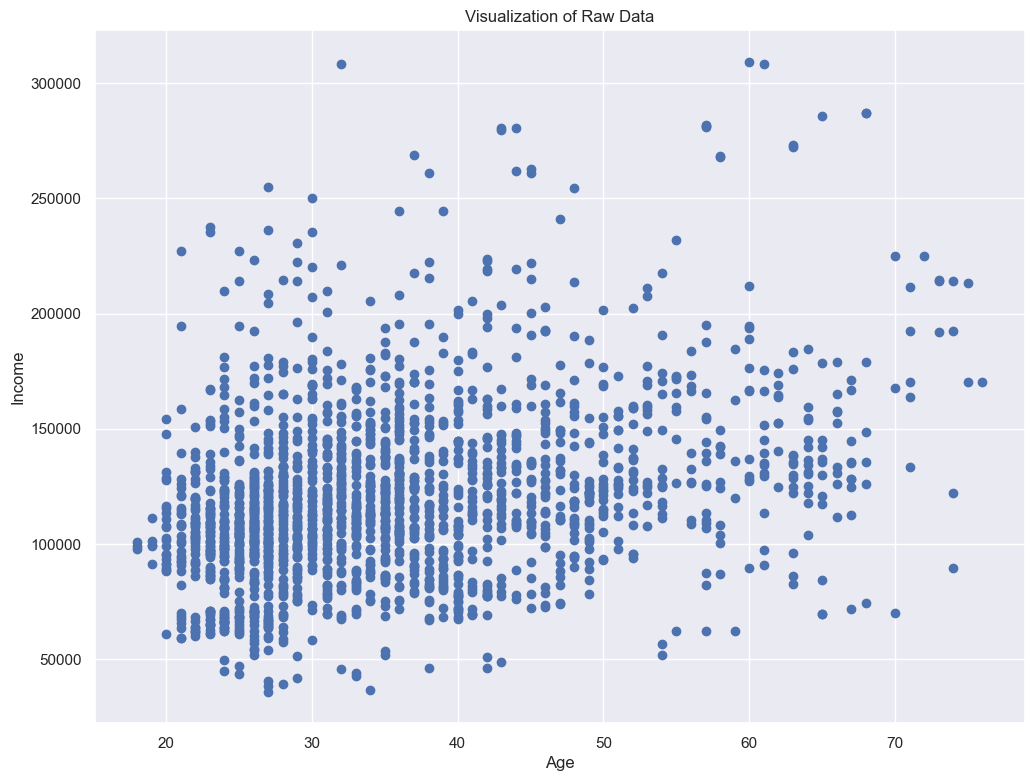

In [7]:
plt.figure(figsize=(12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')

In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [9]:
hier_clust = linkage(segmentation_std, method='ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [180.0, 180.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [260.0, 260.0, 300.0, 300.0],
  [200.0, 200.0, 280.0, 280.0],
  [80.0, 80.0, 240.0, 240.0],
  [325.0, 325.0, 335.0, 335.0],
  [345

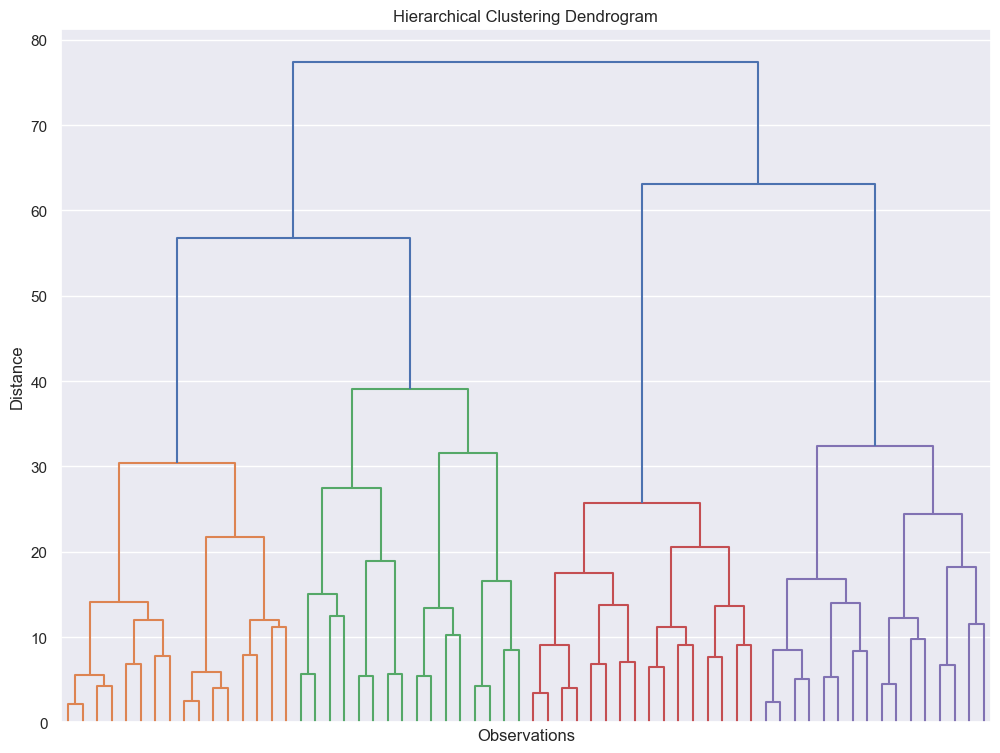

In [10]:
plt.figure(figsize=(12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode='level',
           p = 5,
           show_leaf_counts=True,
           no_labels=True)

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-means Clustering')

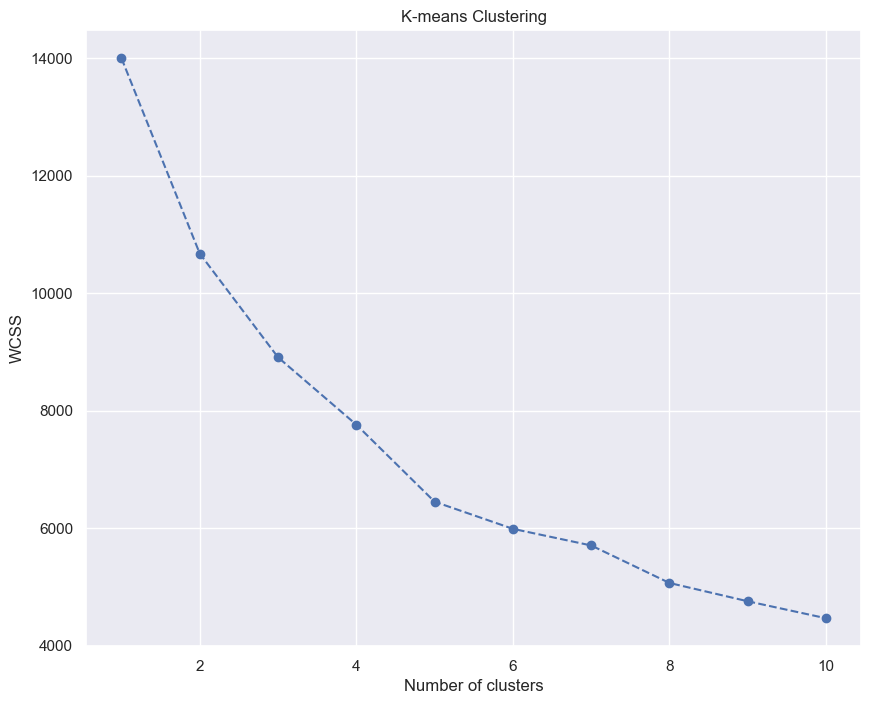

In [12]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [14]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
df_segm_kmeans.head()


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


In [15]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830
1,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349
2,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607
3,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056


In [16]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [17]:
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs
Segment K-means,,,,,,,,
0,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830,541
1,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349,630
2,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607,382
3,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056,447


In [18]:
df_segm_analysis.rename({0:'well-off', 1:'fewer-opportunities', 2:'standard', 3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs
Segment K-means,,,,,,,,
well-off,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830,541
fewer-opportunities,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349,630
standard,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607,382
career focused,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056,447


In [19]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 1:'fewer-opportunities', 2:'standard', 3:'career focused'})

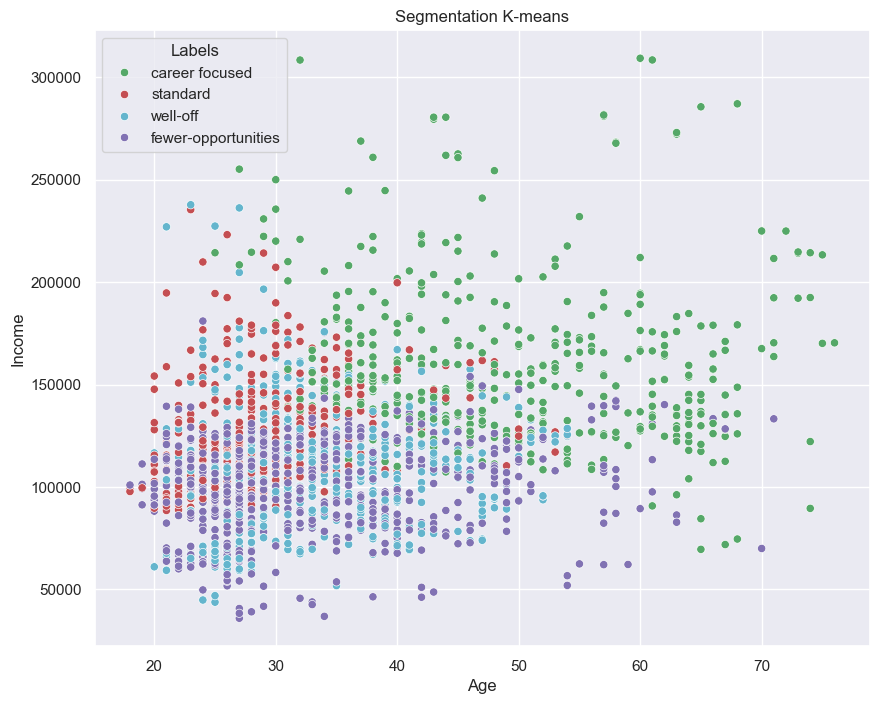

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_segm_kmeans, 
    x=df_segm_kmeans['Age'], 
    y=df_segm_kmeans['Income'],
    hue='Labels', 
    palette=['g', 'r', 'c', 'm']  
)

plt.title('Segmentation K-means')
plt.show()

In [21]:
pca = PCA()

In [22]:
pca.fit(segmentation_std)

PCA()

In [23]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

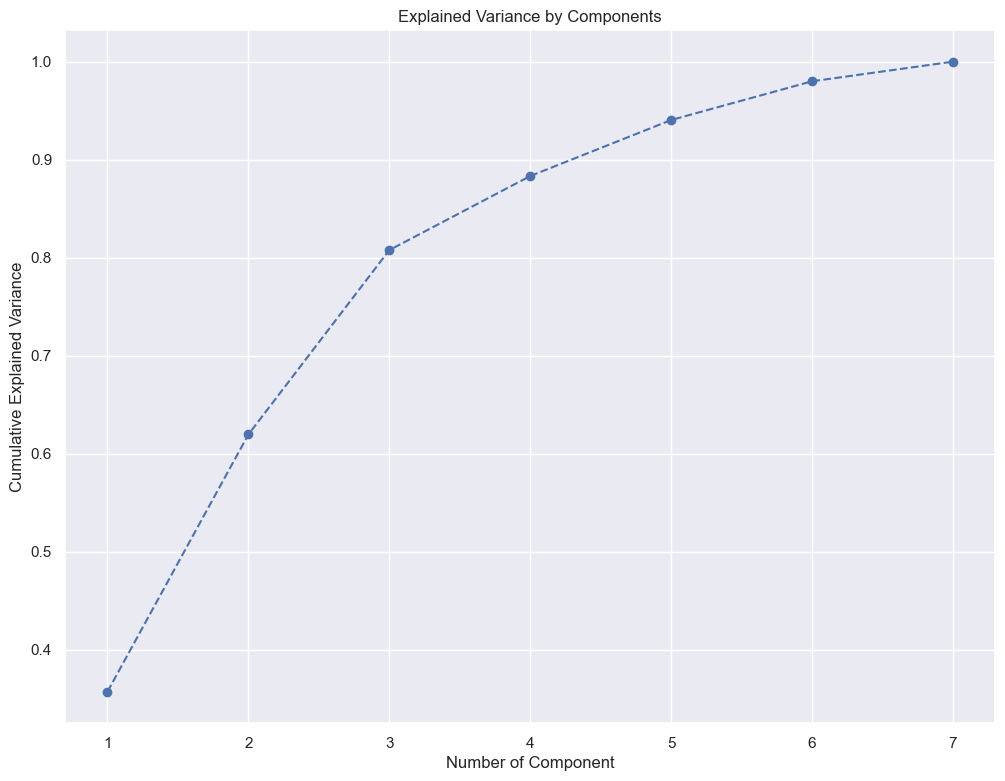

In [24]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Component")
plt.ylabel("Cumulative Explained Variance")

In [29]:
pca = PCA(n_components=3)

In [30]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [31]:
pd.DataFrame(data = pca.components_, columns = df_segmentation.columns.values)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
1,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
2,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [32]:
df_pca_comp = pd.DataFrame(data=pca.components_, columns=df_segmentation.columns.values, index=['Component 1', 'Component 2', 'Component 3'])

In [36]:
df_pca_comp.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x1c9033e7380>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

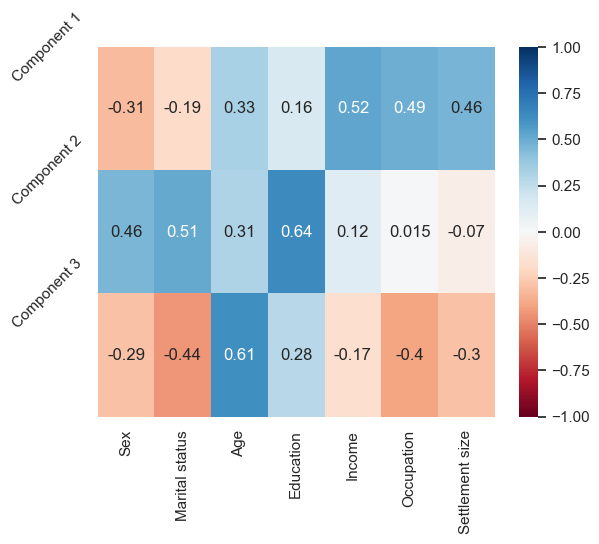

In [38]:
sns.heatmap(df_pca_comp,
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)
plt.yticks([0,1,2], ['Component 1', 'Component 2', 'Component 3'], rotation=45)

In [47]:
scores_pca = pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [41]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-means with PCA Clustering')

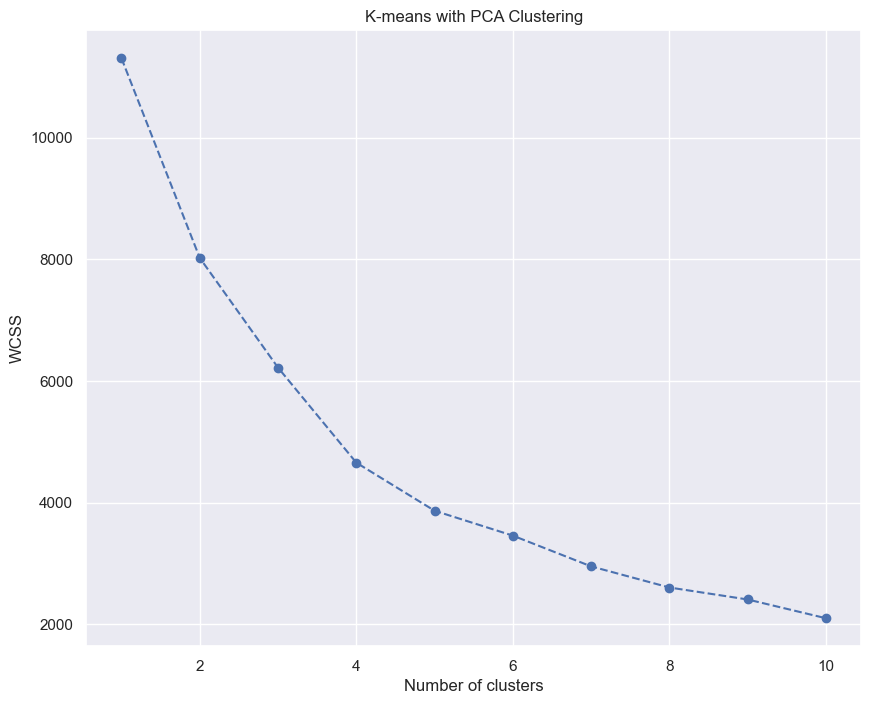

In [42]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')

In [43]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [44]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)

In [48]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,2
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909


In [49]:
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [52]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0


In [53]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()

In [55]:
df_segm_pca_kmeans_freq.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
1,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678
2,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
3,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641


In [56]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 1:'career focused', 2:'fewer opportunities', 3:'well-off'})

In [57]:
df_segm_pca_kmeans_freq.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063,602,0.301
career focused,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678,610,0.305
fewer opportunities,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763,526,0.263
well-off,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641,262,0.131
